In [283]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [284]:
data = pd.read_csv('data/placement.csv')
data.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [285]:
df = data.describe()
df

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'CGPA')

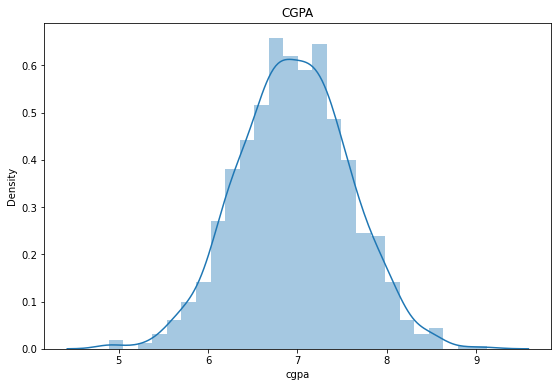

In [286]:
plt.figure(figsize=(20,6))
plt.subplot(121)
sns.distplot(data['cgpa'])
plt.title('CGPA')

 * CGPA ----> Almost Normal Distribution, So use ::: 
 
 # Z-score removal 
   
   
   
  * ( mean + 3 x std ) or ( mean - 3 x std )

In [287]:
low = data['cgpa'].mean() - ( 3 * (data['cgpa'].std()))
high = data['cgpa'].mean() + ( 3 * (data['cgpa'].std()))
low,high

(5.113546374602842, 8.808933625397177)

### Finding the outliers

In [288]:
data[(data['cgpa']>high) | (data['cgpa']<low) ]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


### * Trimming *

In [289]:
new_data_trim = data [ (data['cgpa']<high) & (data['cgpa']>low)]

In [290]:
new_data_trim.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [291]:
data.shape, new_data.shape # 5 outliers removed 

((1000, 3), (995, 3))

### * Capping *

In [292]:
 new_data_cap = data.copy()

In [293]:
new_data_cap['cgpa'] = np.where(new_data_cap['cgpa']>high, high , (np.where(new_data_cap['cgpa']<low,low, new_data_cap['cgpa'])))
new_data_cap.tail()

,cgpa,placement_exam_marks,placed
995,8.808934,44.0,1
996,8.808934,65.0,1
997,5.113546,34.0,0
998,8.620000,46.0,1
999,5.113546,10.0,1


In [294]:
data.shape, new_data_cap.shape # all the 5 outliers capped within low and high range

((1000, 3), (1000, 3))

In [295]:
new_data_cap[(new_data_cap['cgpa']>high) | (new_data_cap['cgpa']<low) ] #no outliers present anymore

,cgpa,placement_exam_marks,placed


In [296]:
new_data_cap.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961499,32.225000,0.489000
std,0.612688,19.130822,0.500129
min,5.113546,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,8.808934,100.000000,1.000000


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) o

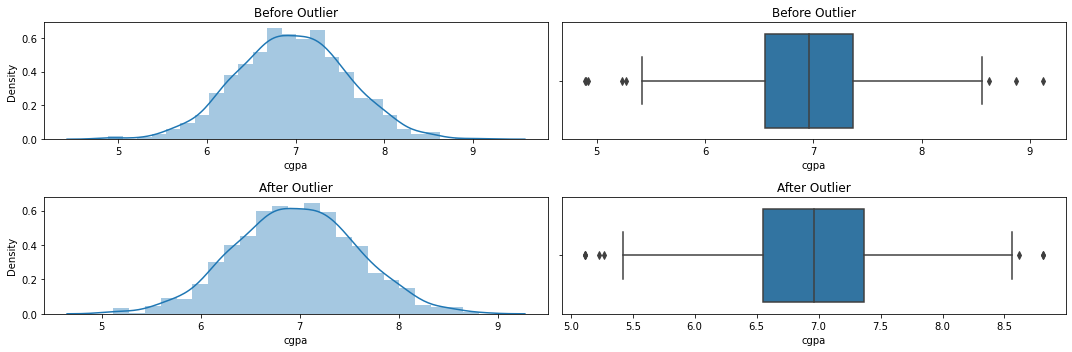

In [297]:
plt.figure(figsize=(15,5))
plt.subplot(2,2,1)
plt.title('Before Outlier')
sns.distplot(data['cgpa'])
plt.subplot(2,2,2)
plt.title('Before Outlier')
sns.boxplot(data['cgpa'])
plt.subplot(2,2,3)
plt.title('After Outlier')
sns.distplot(new_data_cap['cgpa'])
plt.subplot(2,2,4)
plt.title('After Outlier')
sns.boxplot(new_data_cap['cgpa'])
plt.tight_layout()

In [298]:
data = pd.read_csv('data/placement.csv')
data.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [299]:
df = data.describe()
df

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'MARKS')

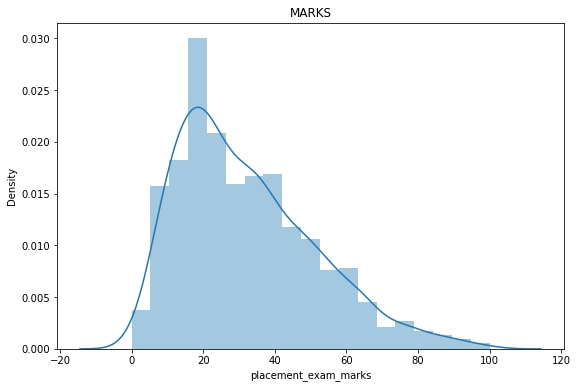

In [300]:
plt.figure(figsize=(20,6))
plt.subplot(121)
sns.distplot(data['placement_exam_marks'])
plt.title('MARKS')

* PLACEMENT_MARKS ----> RIGHT SKEWED DISTRIBUTION, So use ::: 
 
 # IQR Proximity Rule
   
   
   
  * ( Q3 + 1.5 x IQR ) or ( Q1 - 1.5 x IQR )
  * IQR = Q3 - Q1

In [301]:
q1 = np.quantile(data['placement_exam_marks'], 0.25)
q3 = np.quantile(data['placement_exam_marks'], 0.75)
iqr = q3-q1

In [302]:
low = q1 - ( 1.5 * iqr )
high = q3 + ( 1.5 * iqr )
low, high

(-23.5, 84.5)

### Finding the outliers

In [303]:
data[(data['placement_exam_marks']>high) | (data['placement_exam_marks']<low)]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


### * Trimming *

In [305]:
new_data_trim = data[(data['placement_exam_marks']>=low) & (data['placement_exam_marks']<=high)]
new_data_trim.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [306]:
data.shape, new_data_trim.shape #15 outliers removed from data

((1000, 3), (985, 3))

### * Capping *

In [307]:
 new_data_cap = data.copy()

In [308]:
new_data_cap['placement_exam_marks'] = np.where(new_data_cap['placement_exam_marks']>high, high, (np.where(new_data_cap['placement_exam_marks']<low, low, new_data_cap['placement_exam_marks'])))

In [309]:
data.shape,new_data_cap.shape

((1000, 3), (1000, 3))

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) o

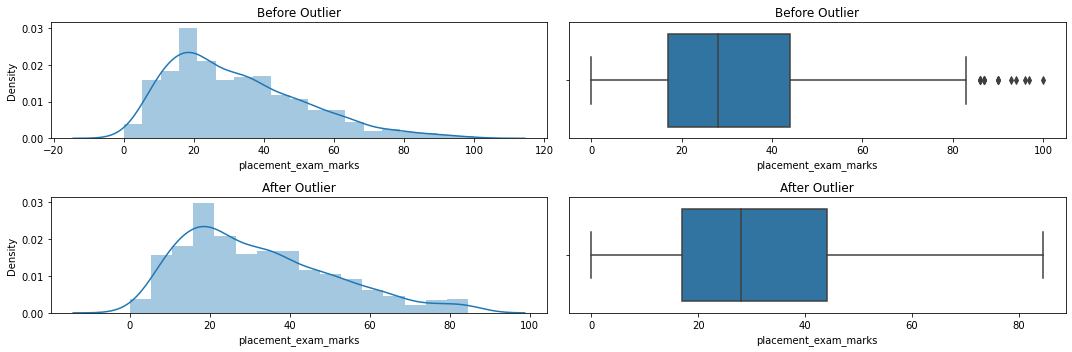

In [311]:
plt.figure(figsize=(15,5))
plt.subplot(2,2,1)
plt.title('Before Outlier')
sns.distplot(data['placement_exam_marks'])
plt.subplot(2,2,2)
plt.title('Before Outlier')
sns.boxplot(data['placement_exam_marks'])
plt.subplot(2,2,3)
plt.title('After Outlier')
sns.distplot(new_data_cap['placement_exam_marks'])
plt.subplot(2,2,4)
plt.title('After Outlier')
sns.boxplot(new_data_cap['placement_exam_marks'])
plt.tight_layout()

# Percentile Method

In [312]:
data = pd.read_csv('data/weight-height.csv')
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Before Outlier'}, xlabel='Height', ylabel='Density'>

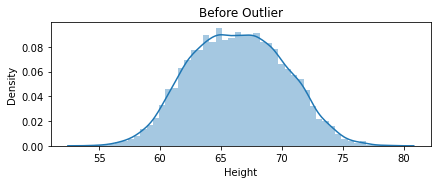

In [333]:
plt.figure(figsize=(15,5))
plt.subplot(2,2,1)
plt.title('Before Outlier')
sns.distplot(data['Height'])


In [315]:
data.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [316]:
low = np.quantile(data['Height'], 0.01)
high = np.quantile(data['Height'], 0.99)
low, high

(58.13441158671655, 74.7857900583366)

In [318]:
data[(data['Height']>high) | (data['Height']<low)]

,Gender,Height,Weight
23,Male,75.205974,228.761781
190,Male,76.709835,235.035419
197,Male,75.944460,231.924749
202,Male,75.140821,224.124271
215,Male,74.795375,232.635403
...,...,...,...
9761,Female,56.975279,90.341784
9825,Female,55.979198,85.417534
9895,Female,57.740192,93.652957
9904,Female,57.028857,101.202551


### * Trimming *

In [320]:
new_data_trim = data[(data['Height']<=high) & (data['Height']>=low)]
new_data_trim.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [321]:
data.shape, new_data_trim.shape

((10000, 3), (9800, 3))

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) o

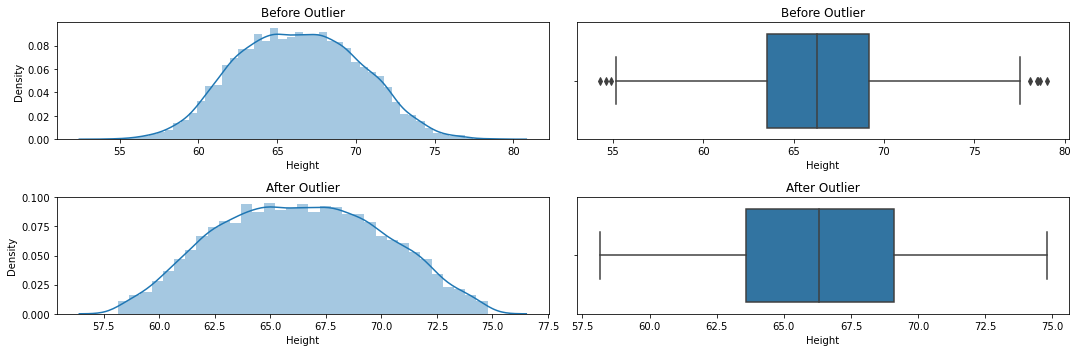

In [328]:
plt.figure(figsize=(15,5))
plt.subplot(2,2,1)
plt.title('Before Outlier')
sns.distplot(data['Height'])
plt.subplot(2,2,2)
plt.title('Before Outlier')
sns.boxplot(data['Height'])
plt.subplot(2,2,3)
plt.title('After Outlier')
sns.distplot(new_data_trim['Height'])
plt.subplot(2,2,4)
plt.title('After Outlier')
sns.boxplot(new_data_trim['Height'])
plt.tight_layout()

### * Capping / Winsorization *

In [329]:
new_data_cap = data.copy()

In [330]:
new_data_cap['Height'] = np.where(new_data_cap['Height']>high, high, (np.where(new_data_cap['Height']<low, low, new_data_cap['Height'])))

In [331]:
data.shape, new_data_cap.shape

((10000, 3), (10000, 3))

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) o

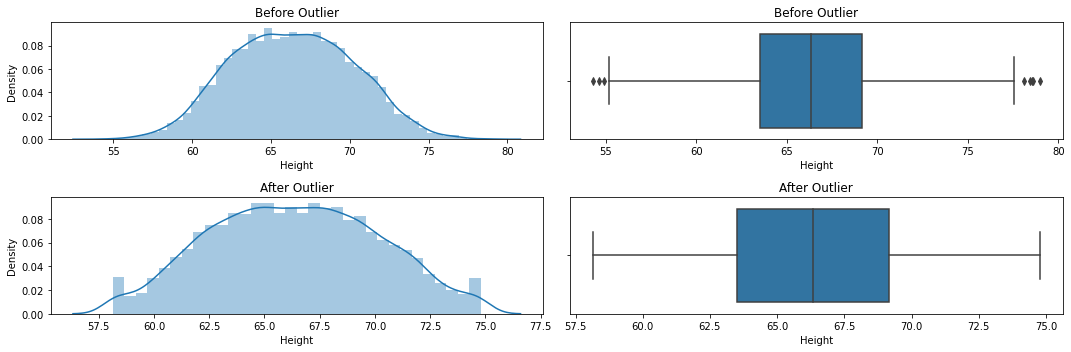

In [332]:
plt.figure(figsize=(15,5))
plt.subplot(2,2,1)
plt.title('Before Outlier')
sns.distplot(data['Height'])
plt.subplot(2,2,2)
plt.title('Before Outlier')
sns.boxplot(data['Height'])
plt.subplot(2,2,3)
plt.title('After Outlier')
sns.distplot(new_data_cap['Height'])
plt.subplot(2,2,4)
plt.title('After Outlier')
sns.boxplot(new_data_cap['Height'])
plt.tight_layout()